### HANDLING THE CATEGORICAL FEATURES:

#### Frequent category imputation:

In [9]:
df= pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [10]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [19]:
df.isnull().mean().sort_values(ascending= True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

In [13]:
# Computing the frequency of every feature in BsmtQual column

<AxesSubplot:xlabel='BsmtQual'>

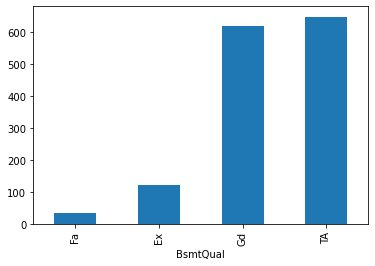

In [18]:
df.groupby('BsmtQual')['BsmtQual'].count().sort_values(ascending=True).plot.bar()

<AxesSubplot:xlabel='GarageType'>

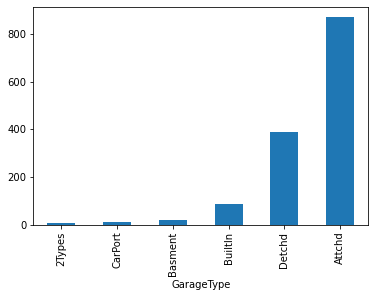

In [20]:
# Computing the frequency of every feature in GarageType column
df.groupby('GarageType')['GarageType'].count().sort_values(ascending=True).plot.bar()


<AxesSubplot:xlabel='FireplaceQu'>

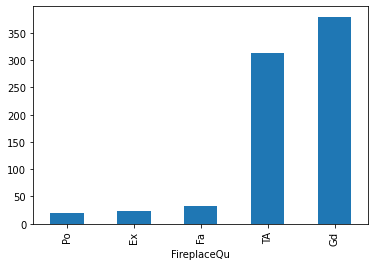

In [21]:
# Computing the frequency of every feature in FireplaceQu column
df.groupby('FireplaceQu')['FireplaceQu'].count().sort_values(ascending=True).plot.bar()

In [33]:
### Replacing Function:

def impute_nan(df,variable):
    most_frequent_category= df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace = True)

In [34]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)
    

In [35]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

Above should not be done in case of higher missing values as it will distort the relation between the feature and dependent variable

#### Adding an variable to catch the nan

In [42]:
df= pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [43]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [50]:
import numpy as np
df['BsmtQual_nan']=np.where(df['BsmtQual'].isnull(),1,0)

In [53]:
frequent= df['BsmtQual'].mode()[0]

In [54]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [56]:
df['BsmtQual'].isnull().sum()

0

In [57]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_nan
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


##### If u have most frequent category, replace NAN with new category:

In [58]:
df= pd.read_csv('train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [61]:
def impute_nan(df,variable):
    df[variable+"-newvar"]= np.where(df[variable].isnull(),"missing",df[variable])

In [62]:
for feature in ['BsmtQual','GarageType','FireplaceQu']:
    impute_nan(df,feature)

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual-newvar,GarageType-newvar,FireplaceQu-newvar
0,Gd,NaN,Attchd,208500,Gd,Attchd,missing
1,Gd,TA,Attchd,181500,Gd,Attchd,TA
2,Gd,TA,Attchd,223500,Gd,Attchd,TA
3,TA,Gd,Detchd,140000,TA,Detchd,Gd
4,Gd,TA,Attchd,250000,Gd,Attchd,TA


In [64]:
df=df.drop(['BsmtQual','GarageType','FireplaceQu'],axis=1)

In [65]:
df.head()

,SalePrice,BsmtQual-newvar,GarageType-newvar,FireplaceQu-newvar
0,208500,Gd,Attchd,missing
1,181500,Gd,Attchd,TA
2,223500,Gd,Attchd,TA
3,140000,TA,Detchd,Gd
4,250000,Gd,Attchd,TA
